# Data Cleaning, EDA, and Preprocessing

In [325]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import nltk
import string
import re
from wordcloud import WordCloud

### Read in data and make dataframes for each CSV

In [326]:
sr1_df = pd.read_csv('./datasets/subreddit1.csv')
sr0_df = pd.read_csv('./datasets/subreddit0.csv')
#sr2_df = pd.read_csv('./datasets/subreddit2.csv')

### Data Cleaning and EDA

In [327]:
sr1_df=sr1_df.dropna().reset_index(drop=True)
sr1_df[sr1_df['posts']=='']

Empty DataFrame
Columns: [names, titles, posts, subreddit]
Index: []

In [328]:
sr0_df=sr0_df.dropna().reset_index(drop=True)
sr0_df[sr0_df['posts']=='']

Empty DataFrame
Columns: [names, titles, posts, subreddit]
Index: []

In [329]:
#Combine both dataframes and shuffle rows. 
comb_df = pd.concat([sr1_df,sr0_df]).reset_index(drop=True)

In [330]:
comb_df = shuffle(comb_df).reset_index(drop=True)
comb_df.head()

names                                             titles  \
0  t3_bzdciy  Tips for negotiating a lower settlement for ac...   
1  t3_bze57t                          Child care credit or FSA?   
2  t3_byxw3i  Need help with creating a budget, saving money...   
3  t3_b9h8la                              Cell phone financing.   
4  t3_bzn0q3  Lease NEW 2019 vehicle or finance USED 2012 ve...   

                                               posts  subreddit  
0  Hi r/personalfinance,\n\nI'm just looking for ...          1  
1  My husband and I had twins this year so we’re ...          1  
2  Hello all, \n  I don’t even know where to real...          1  
3  I'm looking to purchase a new Samsung phone fr...          0  
4  Both vehicles roughly cost $21,000. One would ...          1

In [331]:
#Check class balances between posts from the two subreddits
comb_df.subreddit.value_counts(normalize=True)

0    0.511749
1    0.488251
Name: subreddit, dtype: float64

In [332]:
#This function cleans up text that is fed to it, using regular expressions.

def clean_text(text):
    # remove HTML tags and URLs
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'^https?:\/\/.*[\r\n]*','',text)
    
    # keep only text without punctuation
    text = re.sub(r'[^\w\s]','',text)
    
    # convert text to lowercase
    text = text.strip().lower()

    # split text into a list of words
    token_text = re.split('\W+',text) #W+ --> word chars and dashes permitted
    
    return token_text

In [333]:
comb_df['post_tokens'] = comb_df['posts'].apply(lambda x: clean_text(x))
comb_df['title_tokens'] = comb_df['titles'].apply(lambda x: clean_text(x))
comb_df = comb_df[['subreddit','names','titles','title_tokens','posts','post_tokens']]
comb_df.head()

subreddit      names                                             titles  \
0          1  t3_bzdciy  Tips for negotiating a lower settlement for ac...   
1          1  t3_bze57t                          Child care credit or FSA?   
2          1  t3_byxw3i  Need help with creating a budget, saving money...   
3          0  t3_b9h8la                              Cell phone financing.   
4          1  t3_bzn0q3  Lease NEW 2019 vehicle or finance USED 2012 ve...   

                                        title_tokens  \
0  [tips, for, negotiating, a, lower, settlement,...   
1                     [child, care, credit, or, fsa]   
2  [need, help, with, creating, a, budget, saving...   
3                           [cell, phone, financing]   
4  [lease, new, 2019, vehicle, or, finance, used,...   

                                               posts  \
0  Hi r/personalfinance,\n\nI'm just looking for ...   
1  My husband and I had twins this year so we’re ...   
2  Hello all, \n  I don’t even know where to real...   
3  I'm looking to purchase a new Samsung phone fr...   
4  Both vehicles roughly cost $21,000. One would ...   

                                         post_tokens  
0  [hi, rpersonalfinance, im, just, looking, for,...  
1  [my, husband, and, i, had, twins, this, year, ...  
2  [hello, all, i, dont, even, know, where, to, r...  
3  [im, looking, to, purchase, a, new, samsung, p...  
4  [both, vehicles, roughly, cost, 21000, one, wo...

In [334]:
def unstop(text):
    en_stopwords = list(nltk.corpus.stopwords.words('english'))
    new_stopwords = en_stopwords.extend(['ampx200b','x200b','amp'])
    
    text = [word for word in text if word not in en_stopwords]
    
    return text

In [335]:
comb_df['titles_unstopped'] = comb_df['title_tokens'].apply(lambda x: unstop(x))
comb_df['posts_unstopped']=comb_df['post_tokens'].apply(lambda x: unstop(x))
comb_df = comb_df[['subreddit','names','titles','title_tokens','titles_unstopped',
                   'posts','post_tokens','posts_unstopped']]
comb_df.head()

subreddit      names                                             titles  \
0          1  t3_bzdciy  Tips for negotiating a lower settlement for ac...   
1          1  t3_bze57t                          Child care credit or FSA?   
2          1  t3_byxw3i  Need help with creating a budget, saving money...   
3          0  t3_b9h8la                              Cell phone financing.   
4          1  t3_bzn0q3  Lease NEW 2019 vehicle or finance USED 2012 ve...   

                                        title_tokens  \
0  [tips, for, negotiating, a, lower, settlement,...   
1                     [child, care, credit, or, fsa]   
2  [need, help, with, creating, a, budget, saving...   
3                           [cell, phone, financing]   
4  [lease, new, 2019, vehicle, or, finance, used,...   

                                    titles_unstopped  \
0  [tips, negotiating, lower, settlement, account...   
1                         [child, care, credit, fsa]   
2  [need, help, creating, budget, saving, money, ...   
3                           [cell, phone, financing]   
4  [lease, new, 2019, vehicle, finance, used, 201...   

                                               posts  \
0  Hi r/personalfinance,\n\nI'm just looking for ...   
1  My husband and I had twins this year so we’re ...   
2  Hello all, \n  I don’t even know where to real...   
3  I'm looking to purchase a new Samsung phone fr...   
4  Both vehicles roughly cost $21,000. One would ...   

                                         post_tokens  \
0  [hi, rpersonalfinance, im, just, looking, for,...   
1  [my, husband, and, i, had, twins, this, year, ...   
2  [hello, all, i, dont, even, know, where, to, r...   
3  [im, looking, to, purchase, a, new, samsung, p...   
4  [both, vehicles, roughly, cost, 21000, one, wo...   

                                     posts_unstopped  
0  [hi, rpersonalfinance, im, looking, tips, talk...  
1  [husband, twins, year, new, territory, taxwise...  
2  [hello, dont, even, know, really, start, partn...  
3  [im, looking, purchase, new, samsung, phone, c...  
4  [vehicles, roughly, cost, 21000, one, would, 2...

### Cleaning: Lemmatisation

In [336]:
wnl = nltk.WordNetLemmatizer()

def lemmatize(tokenized_text):
    text = [wnl.lemmatize(word) for word in tokenized_text]
    return text

In [337]:
comb_df['posts_lemmatized'] = comb_df['posts_unstopped'].apply(lambda x: lemmatize(x))
comb_df['titles_lemmatized'] = comb_df['titles_unstopped'].apply(lambda x: lemmatize(x))

comb_df = comb_df[['subreddit','names',
                   'titles','title_tokens','titles_unstopped','titles_lemmatized',
                   'posts','post_tokens','posts_unstopped','posts_lemmatized']]


comb_df.head()

subreddit      names                                             titles  \
0          1  t3_bzdciy  Tips for negotiating a lower settlement for ac...   
1          1  t3_bze57t                          Child care credit or FSA?   
2          1  t3_byxw3i  Need help with creating a budget, saving money...   
3          0  t3_b9h8la                              Cell phone financing.   
4          1  t3_bzn0q3  Lease NEW 2019 vehicle or finance USED 2012 ve...   

                                        title_tokens  \
0  [tips, for, negotiating, a, lower, settlement,...   
1                     [child, care, credit, or, fsa]   
2  [need, help, with, creating, a, budget, saving...   
3                           [cell, phone, financing]   
4  [lease, new, 2019, vehicle, or, finance, used,...   

                                    titles_unstopped  \
0  [tips, negotiating, lower, settlement, account...   
1                         [child, care, credit, fsa]   
2  [need, help, creating, budget, saving, money, ...   
3                           [cell, phone, financing]   
4  [lease, new, 2019, vehicle, finance, used, 201...   

                                   titles_lemmatized  \
0  [tip, negotiating, lower, settlement, account,...   
1                         [child, care, credit, fsa]   
2  [need, help, creating, budget, saving, money, ...   
3                           [cell, phone, financing]   
4  [lease, new, 2019, vehicle, finance, used, 201...   

                                               posts  \
0  Hi r/personalfinance,\n\nI'm just looking for ...   
1  My husband and I had twins this year so we’re ...   
2  Hello all, \n  I don’t even know where to real...   
3  I'm looking to purchase a new Samsung phone fr...   
4  Both vehicles roughly cost $21,000. One would ...   

                                         post_tokens  \
0  [hi, rpersonalfinance, im, just, looking, for,...   
1  [my, husband, and, i, had, twins, this, year, ...   
2  [hello, all, i, dont, even, know, where, to, r...   
3  [im, looking, to, purchase, a, new, samsung, p...   
4  [both, vehicles, roughly, cost, 21000, one, wo...   

                                     posts_unstopped  \
0  [hi, rpersonalfinance, im, looking, tips, talk...   
1  [husband, twins, year, new, territory, taxwise...   
2  [hello, dont, even, know, really, start, partn...   
3  [im, looking, purchase, new, samsung, phone, c...   
4  [vehicles, roughly, cost, 21000, one, would, 2...   

                                    posts_lemmatized  
0  [hi, rpersonalfinance, im, looking, tip, talk,...  
1  [husband, twin, year, new, territory, taxwise,...  
2  [hello, dont, even, know, really, start, partn...  
3  [im, looking, purchase, new, samsung, phone, c...  
4  [vehicle, roughly, cost, 21000, one, would, 20...

### Visualisation

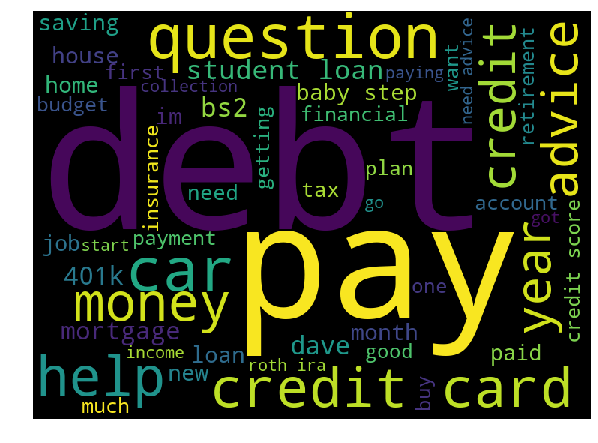

In [338]:
text = ' '
  
# iterate through the lemmatised titles column of the combined dataframe
for x in comb_df.titles_lemmatized: 
          
    for words in x: 
        text = text + words + ' '
  
titles_wc = WordCloud(max_words= 50,
                      width = 744, 
                      height = 544,
                      background_color ='black',
                      stopwords=en_stopwords.extend(['x200b','amp']), 
                      contour_width=3, 
                      contour_color='steelblue',
                      min_font_size = 10).generate(text) 
  
# plot the WordCloud image                        
plt.figure(figsize = (10, 10)) 
plt.imshow(titles_wc) 
plt.axis("off")
plt.savefig('./images/reddit_titles_wordcloud.png')

In [339]:
def word_count(string):
    counts = dict()
    words = string.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

In [340]:
#get word count for wods present in all titles, then show top 10 most common words
title_wordcount_df = pd.DataFrame(word_count(text),index=['word_count']).T.sort_values(by='word_count',ascending=False).reset_index()
title_wordcount_df = title_wordcount_df.rename(index=str,columns={'index':'word'})

<BarContainer object of 30 artists>

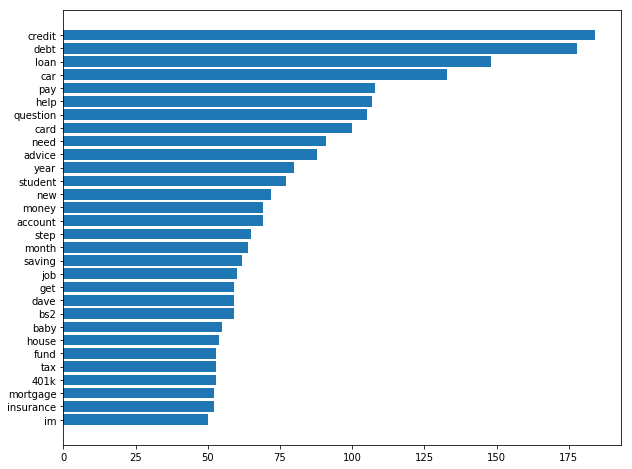

In [341]:
plt.figure(figsize=(10,8))
plt.barh(y=title_wordcount_df['word'].head(30)[::-1],
         width=title_wordcount_df['word_count'].head(30)[::-1])

In [342]:
len(title_wordcount_df['word'])

2563

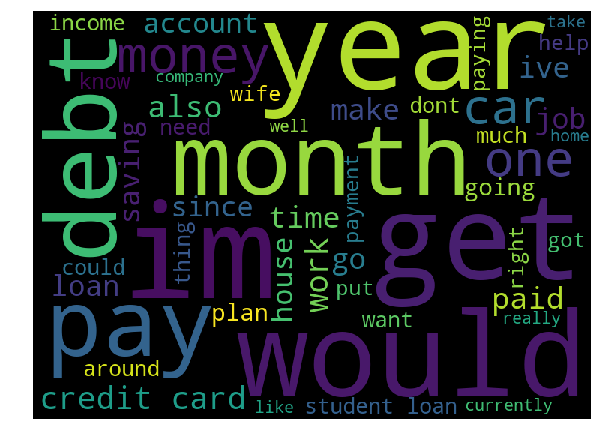

In [343]:
text2 = ' '
  
# iterate through the lemmatised post text column of the combined dataframe
for x in comb_df.posts_lemmatized: 
          
    for words in x: 
        text2 = text2 + words + ' '
  
posts_wc = WordCloud(max_words= 50,
                      width = 744, 
                      height = 544,
                      background_color ='black',
                      stopwords=en_stopwords, 
                      contour_width=3, 
                      contour_color='steelblue',
                      min_font_size = 10).generate(text2) 
  
# plot the WordCloud image                        
plt.figure(figsize = (10, 10)) 
plt.imshow(posts_wc) 
plt.axis("off")
plt.savefig('./images/reddit_posts_wordcloud.png')

In [344]:
#get word count for words present in all titles, then show top 10 most common words
post_wordcount_df = pd.DataFrame(word_count(text2),index=['word_count']).T.sort_values(by='word_count',ascending=False).reset_index()
post_wordcount_df = post_wordcount_df.rename(index=str,columns={'index':'word'})

<BarContainer object of 30 artists>

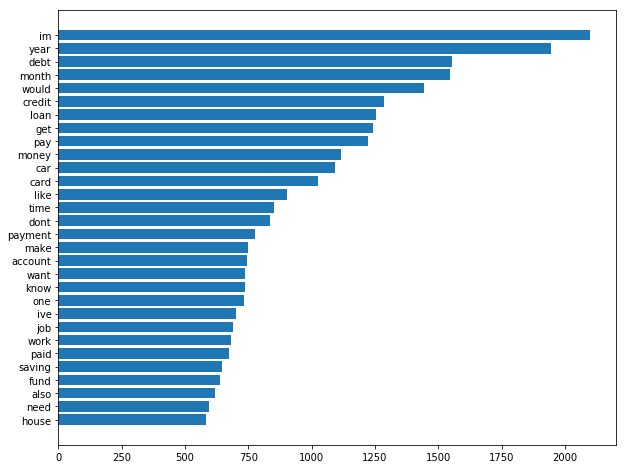

In [345]:
plt.figure(figsize=(10,8))
plt.barh(y=post_wordcount_df['word'].head(30)[::-1],
         width=post_wordcount_df['word_count'].head(30)[::-1])

In [346]:
comb_df.to_csv('./datasets/combined_df.csv')

#save wordcount DF in case it is relevant again later
title_wordcount_df.to_csv('./datasets/title_wordcount.csv')
post_wordcount_df.to_csv('./datasets/post_wordcount.csv')